In [118]:
import numpy as np
import matplotlib.pyplot as plt
import coremltools
import lime
import IProgress
import tqdm
import torch
import torchvision

In [119]:
from PIL import Image
from lime import lime_image
from ipywidgets import IntProgress as IProgress
from skimage.segmentation import mark_boundaries
from torchvision import transforms

### Import Model & Test Images

In [5]:
model_path = 'WasteClassifier.mlmodel'

img_path1 = 'plastic32.jpg'
img_path2 = 'cardboard85.jpg'
img_path3 = 'metal349.jpg'

In [153]:
labels = [1,2,3,4,5,6]
# dictionary of label strings to numbers
class_labels = {'cardboard': 0,
                'paper': 1,
                'glass': 2,
                'plastic': 3,
                'trash': 4,
                'metal': 5}

In [121]:
img1 = Image.open(img_path1).convert('RGB')
img2 = Image.open(img_path2)
img3 = Image.open(img_path3)

In [8]:
model = coremltools.models.MLModel(model_path) 

## LIME Analysis

In [9]:
# create lime explanation for prediction
explainer = lime_image.LimeImageExplainer(verbose=True)

In [151]:
# image class prediction function, fed into the explainer
def class_pred(image_array):
    
    print(image_array.shape)
    
    # reshape array
    image_array = image_array.reshape((384,512,3))
    
    # make sure array is an array of int
    int_array = np.uint8(image_array)
    
    # convert array back to PIL Image
    image = Image.fromarray(int_array)
    
    # get predictions for each image
    predictions = model.predict({'image': img1}) 
    
    # obtain prediction for each class
    p = predictions['classLabelProbs']
    
    # convert into array of tuples
    pred_list = [(class_labels[key],value) for key,value in p.items()] # return array
    
    return pred_list

In [120]:
def get_pil_transform(): 
    transf = transforms.Compose([transforms.Resize((384, 512))])    

    return transf

In [126]:
pil_transf = get_pil_transform()
print(np.array(pil_transf(img1)).shape)

(384, 512, 3)


In [77]:
arr = np.array(img1)
image = Image.fromarray(np.uint8(arr))
predictions = model.predict({'image': image}) 
print(predictions)

{'classLabelProbs': {'cardboard': 6.9276662604019296e-18, 'paper': 8.271752659117591e-23, 'glass': 1.3931493118473968e-05, 'plastic': 0.9999860685068815, 'trash': 4.8109540581374524e-24, 'metal': 3.8873121654066157e-17}, 'classLabel': 'plastic'}


### Test Image 1

(384, 512, 3)


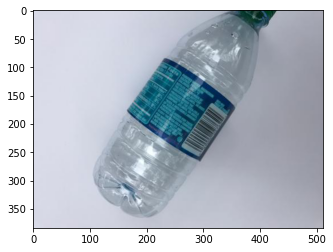

In [106]:
plt.imshow(np.asarray(img1))
print(np.asarray(img1).shape)

In [11]:
pred1 = model.predict({'image':img1})
print(pred1)

{'classLabelProbs': {'cardboard': 6.9276662604019296e-18, 'paper': 8.271752659117591e-23, 'glass': 1.3931493118473968e-05, 'plastic': 0.9999860685068815, 'trash': 4.8109540581374524e-24, 'metal': 3.8873121654066157e-17}, 'classLabel': 'plastic'}


In [12]:
label1 = pred1['classLabel']
print(label1)

plastic


As can be seen, the model outputs the correct prediction for image 1.

In [154]:
explanation = explainer.explain_instance(np.array(pil_transf(img1)), 
                                         class_pred, # classification function
                                         labels,     # class labels
                                         num_samples=1, 
                                         top_labels=6,
                                         hide_color=0)


(1, 384, 512, 3)


ValueError: Found input variables with inconsistent numbers of samples: [1, 6]

In [148]:
print(explanation.top_labels)

[1, 0]


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


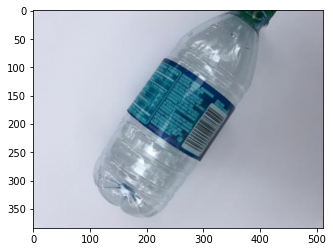

In [150]:
# find masks and temperatures of areas that caused prediction
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, hide_rest=False, min_weight=0.2)
print(mask)
img_boundary = mark_boundaries(temp / 255, mask) 
plt.imshow(img_boundary)

### Test Image 2

In [35]:
pred2 = model.predict({'image':img2})

### Test Image 3

In [36]:

pred3 = model.predict({'image':img3})